<a href="https://colab.research.google.com/github/lukpares/coffee/blob/main/coffee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the data

The data has been sourced from kaggle datasets.  
[https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi](https://www.kaggle.com/datasets/fatihb/coffee-quality-data-cqi)  
[https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi](https://www.kaggle.com/datasets/volpatto/coffee-quality-database-from-cqi)


### Coffee Quality Institute

The Coffee Quality Institute (CQI) is a non-profit organization that works to improve the quality and value of coffee worldwide. It was founded in 1996 and has its headquarters in California, USA.

CQI's mission is to promote coffee quality through a range of activities that include research, training, and certification programs. The organization works with coffee growers, processors, roasters, and other stakeholders to improve coffee quality standards, promote sustainability, and support the development of the specialty coffee industry.
### Data

CQI maintains a web database that serves as a resource for coffee professionals and enthusiasts who are interested in learning about coffee quality and sustainability. The database includes a range of information on coffee production, processing, and sensory evaluation. It also contains data on coffee genetics, soil types, and other factors that can affect coffee quality.
Sensory evaluations (coffee quality scores)

- Aroma: Refers to the scent or fragrance of the coffee.
- Flavor: The flavor of coffee is evaluated based on the taste, including any sweetness, bitterness, acidity, and other flavor notes.
- Aftertaste: Refers to the lingering taste that remains in the mouth after swallowing the coffee.
- Acidity: Acidity in coffee refers to the brightness or liveliness of the taste.
- Body: The body of coffee refers to the thickness or viscosity of the coffee in the mouth.
- Balance: Balance refers to how well the different flavor components of the coffee work together.
- Uniformity: Uniformity refers to the consistency of the coffee from cup to cup.
- Clean Cup: A clean cup refers to a coffee that is free of any off-flavors or defects, such as sourness, mustiness, or staleness.
- Sweetness: It can be described as caramel-like, fruity, or floral, and is a desirable quality in coffee.

### Defects

Defects are undesirable qualities that can occur in coffee beans during processing or storage. Defects can be categorized into two categories: Category One and Category Two defects.

Category One defects are primary defects that can be perceived through visual inspection of the coffee beans. These defects include Black beans, sour beans, insect-damaged beans, fungus-damaged beans, etc.

Category Two defects are secondary defects that are more subtle and can only be detected through tasting. These defects include Over-fermentation, staleness, rancidness, chemical taste, etc.

# Loading Data

In [16]:
import pandas as pd

pd.set_option('display.max_columns', None)

df_2023 = pd.read_csv("https://raw.githubusercontent.com/lukpares/coffee/main/arabica_clean_2023.csv", index_col=0)
df_2023["Species"] = "Arabica"
df_2023["Dataset"] = "2023"
df_2023.head(1)

,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Status,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact,Species,Dataset
0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Completed,Double Anaerobic Washed,8.58,8.5,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,Arabica,2023


In [17]:
df_2018 = pd.read_csv("https://raw.githubusercontent.com/lukpares/coffee/main/merged_cleaned_2018.csv", index_col=0)
df_2018["Dataset"] = "2018"
df_2018.head(1)

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters,Dataset
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.5,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0,2018


In [21]:
# concatenate datasets from 2018 & 2023
columns_2023 = ['Species', 'Country of Origin', 'Farm Name', 'Lot Number', 'Mill',
            'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
            'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
            'Grading Date', 'Owner', 'Variety', 'Processing Method',
            'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
            'Uniformity', 'Clean Cup', 'Sweetness',
            'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
            'Quakers', 'Color', 'Category Two Defects', 'Expiration',
            'Certification Body', 'Certification Address', 'Certification Contact', 'Dataset']
columns_2018 = ['Species', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
            'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
            'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
            'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
            'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
            'Clean.Cup', 'Sweetness', 'Total.Cup.Points',
            'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
            'Category.Two.Defects', 'Expiration', 'Certification.Body',
            'Certification.Address', 'Certification.Contact', 'Dataset']
df1 = df_2023[columns_2023]
df2 = df_2018[columns_2018]
df2.columns = columns_2023

df_coffee = pd.concat([df1, df2], ignore_index=True)

# Data Analysis

In [23]:
# glance at the data
df_coffee.head(1)

,Species,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact,Dataset
0,Arabica,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,Double Anaerobic Washed,8.58,8.5,8.42,8.58,8.25,8.42,10.0,10.0,10.0,89.33,11.8,0,0.0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901,2023


In [20]:
# Coffee DataFrame dimensions
df_coffee.shape

(1546, 38)

In [26]:
# check column datatypes
df_coffee.dtypes

Species                   object
Country of Origin         object
Farm Name                 object
Lot Number                object
Mill                      object
ICO Number                object
Company                   object
Altitude                  object
Region                    object
Producer                  object
Number of Bags             int64
Bag Weight                object
In-Country Partner        object
Harvest Year              object
Grading Date              object
Owner                     object
Variety                   object
Processing Method         object
Aroma                    float64
Flavor                   float64
Aftertaste               float64
Acidity                  float64
Body                     float64
Balance                  float64
Uniformity               float64
Clean Cup                float64
Sweetness                float64
Total Cup Points         float64
Moisture Percentage      float64
Category One Defects       int64
Quakers   

In [29]:
# get descriptive statistics of numeric
df_coffee.describe()

,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.000000,1546.00000,1546.000000,1546.000000,1546.000000,1545.000000,1546.00000
mean,154.352523,7.587374,7.550459,7.427684,7.556404,7.534023,7.534890,9.855692,9.857186,9.87588,82.306320,1.513933,0.433376,0.242718,3.38163
std,150.342067,0.370470,0.392108,0.395479,0.369718,0.357262,0.394247,0.520182,0.713145,0.57542,3.363745,3.655615,2.385452,1.005162,5.07936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,10.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.00000,81.330000,0.100000,0.000000,0.000000,0.00000
50%,149.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.580000,10.000000,10.000000,10.00000,82.670000,0.110000,0.000000,0.000000,2.00000
75%,275.000000,7.750000,7.750000,7.670000,7.750000,7.750000,7.750000,10.000000,10.000000,10.00000,83.830000,0.120000,0.000000,0.000000,4.00000
max,2240.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.00000,90.580000,13.500000,63.000000,12.000000,55.00000


### Insights about the data
TODO


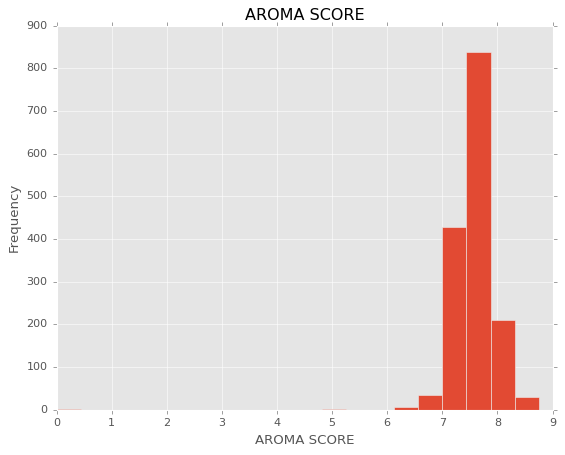

In [40]:
import matplotlib.pyplot as plt
x = "Aroma"
bins=20
plt.style.use('ggplot')

ax = df_coffee[x].plot(kind='hist', bins=bins, title= f'{x} Score'.upper())
ax.set_xlabel(f"{x} Score".upper())
plt.show()

# Coffe recomemnder